In [1]:
from ssestm import SSESTM
from tqdm import tqdm
import pandas as pd
import numpy as np

# 1. Load data

In [12]:
df = pd.read_excel("./data/article_new.xlsx")

In [13]:
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]

In [14]:
train.to_excel("./data/train.xlsx")

In [15]:
test.to_excel("./data/test.xlsx")

# 2. Model initializing

In [16]:
# If you initialize at the first time, you need to 
model = SSESTM(alpha_plus=0.3, alpha_minus=0.3, kappa=3,
                 reg=0.05, alpha_rate=0.001, max_iters=1000000, error=0.00000001, skip_params_gen=True)

In [17]:
# model.train(path="./data/train.xlsx")

In [18]:
df = pd.read_excel("./data/test.xlsx")

In [ ]:
model.load_params()
return_values = []
sentiments_scores = []
for idx, row in tqdm(df.iterrows()):
    if not pd.isna(row["Return2"]) and not pd.isna(row["Content"]):
        try:
            return_values.append(row["Return2"])
            sentiments_scores.append(model.predict(row["Content"]))
        except Keyboard:
            # Exception for math domain error due to the limitation of gradient descent.
            return_values.pop()
            continue

286it [00:17, 10.40it/s]

# 3. Plot correlation

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

[DEBUG] Loaded backend module://ipykernel.pylab.backend_inline version unknown.


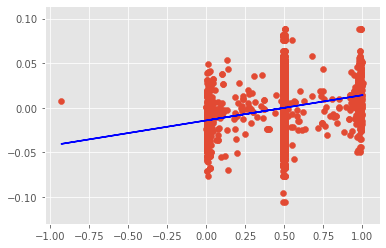

In [28]:
%matplotlib inline
matplotlib.style.use('ggplot')

return_values = np.array(return_values, dtype=float).reshape(-1, 1)
sentiments_scores = np.array(sentiments_scores, dtype=float).reshape(-1, 1)

sentiments_scores = np.where(np.isnan(sentiments_scores), sentiments_scores.mean(), sentiments_scores)

linear_regressor = LinearRegression()
linear_regressor.fit(sentiments_scores, return_values)

plt.scatter(sentiments_scores, return_values)

Y_pred = linear_regressor.predict(sentiments_scores)
plt.plot(sentiments_scores, Y_pred, color='blue')
plt.show()

In [29]:
r2_score(return_values, Y_pred)

0.09493363314325187

In [30]:
mod = sm.OLS(Y_pred, return_values)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [31]:
p_values

x1    1.048510e-77
Name: P>|t|, dtype: float64